In [2]:
import pandas as pd
import numpy as np
DROPBOX_PATH = '/Users/tejav/Dropbox/Data_Int_Fin_Class/rawdata/fx/'

In [3]:
reuters_spot = pd.read_csv(DROPBOX_PATH + 'reuters_spot_monthly.csv').set_index('Date').drop(columns=['Name'])
reuters_forward = pd.read_csv(DROPBOX_PATH + 'reuters_forward_monthly.csv').set_index('Date').drop(columns=['Name'])

barclays_spot = pd.read_csv(DROPBOX_PATH + 'barclays_monthly_spot.csv').set_index('Date').drop(columns=['Name'])
barclays_forward = pd.read_csv(DROPBOX_PATH + 'barclays_monthly_forward.csv').set_index('Date').drop(columns=['Name'])

In [4]:
reuters_spot.index = pd.to_datetime(reuters_spot.index)
reuters_forward.index = pd.to_datetime(reuters_forward.index)

barclays_spot.index = pd.to_datetime(barclays_spot.index)
barclays_forward.index = pd.to_datetime(barclays_forward.index)

In [5]:
reuters_spot = reuters_spot.astype(float) 
reuters_forward = reuters_forward.astype(float)
reuters_forward.columns = reuters_spot.columns

barclays_spot = barclays_spot.astype(float)
barclays_forward = barclays_forward.astype(float)
barclays_forward.columns = barclays_spot.columns

In [6]:
reuters_spot[reuters_spot == 0] = None
reuters_forward[reuters_forward == 0] = None

barclays_spot[barclays_spot == 0] = None
barclays_forward[barclays_forward == 0] = None

barclays_spot = barclays_spot[:'12-31-1996']
barclays_forward = barclays_forward[:'12-31-1996']


In [7]:
reuters_discount = np.log(reuters_forward) - np.log(reuters_spot)
reuters_spot_change = np.log(reuters_spot.shift(-1)) - np.log(reuters_spot)
reuters_excess_return = -reuters_spot_change + reuters_discount

barclays_discount = np.log(barclays_forward) - np.log(barclays_spot)
barclays_spot_change = np.log(barclays_spot.shift(-1)) - np.log(barclays_spot)
barclays_excess_return = -barclays_spot_change + barclays_discount

In [8]:
discounts = [[], [], [], [], [], []]
spot_changes = [[], [], [], [], [], []]
excess_returns = [[], [], [], [], [], []]
dates = [[], [], [], [], [], []]

for i in range(0, barclays_discount.shape[0]):
    row = barclays_discount.iloc[i].dropna().sort_values()
    for j in range(0, row.shape[0]):
        discount_period = row.iloc[j]
        spot_change_period = barclays_spot_change.iloc[i][row.index[j]]
        excess_return_period = barclays_excess_return.iloc[i][row.index[j]]
        if pd.isnull(discount_period) or pd.isnull(spot_change_period) or pd.isnull(excess_return_period):
            continue
        for k in range(0, 6):
            if (k + 1) * row.shape[0]/6 > j:
                discounts[k].append(discount_period)
                spot_changes[k].append(spot_change_period)
                excess_returns[k].append(excess_return_period)
                dates[k].append(row.name)
                break
                
                
for i in range(0, reuters_discount.shape[0]):
    row = reuters_discount.iloc[i].dropna().sort_values()
    for j in range(0, row.shape[0]):
        discount_period = row.iloc[j]
        spot_change_period = reuters_spot_change.iloc[i][row.index[j]]
        excess_return_period = reuters_excess_return.iloc[i][row.index[j]]
        if pd.isnull(discount_period) or pd.isnull(spot_change_period) or pd.isnull(excess_return_period):
            continue
        for k in range(0, 6):
            if (k + 1) * row.shape[0]/6 > j:
                discounts[k].append(discount_period)
                spot_changes[k].append(spot_change_period)
                excess_returns[k].append(excess_return_period)
                dates[k].append(row.name)
                break
                

In [9]:
import statistics

for i in spot_changes:
    print(statistics.mean(i) * 100 * 12)

for i in spot_changes:
    print(statistics.pstdev(i) * 100 * np.sqrt(12))

-0.17148137660924279
0.5848546771493777
-1.1691406105005226
-1.1179733130072016
1.4278756211381207
3.882259448495402
8.996607735302199
9.142148103935941
10.089468747745864
9.131793090993648
11.888735038244072
14.593846642712466


In [10]:
for i in discounts:
    print(statistics.mean(i) * 100 * 12)

for i in discounts:
    print(statistics.pstdev(i) * 100 * np.sqrt(12))

-5.791035522403023
-0.894430743278283
-0.14096539928013435
0.7262694573714455
2.6196395649480833
9.96142714578638
14.974159327773945
0.42501508950029204
0.44382269984194356
0.45477392570583947
0.7050518368957901
4.27829527042163


In [11]:
for i in excess_returns:
    print(statistics.mean(i) * 100 * 12)
for i in excess_returns:
    print(statistics.pstdev(i) * 100 * np.sqrt(12))
for i in excess_returns:
    print((statistics.mean(i) * 100 * 12)/(statistics.pstdev(i) * 100 * np.sqrt(12)))

-5.61955414579378
-1.4792854204276606
1.0281752112203881
1.8442427703786468
1.1917639438099628
6.07916769729098
17.999100601226345
9.158039045764932
10.126938244649551
9.15666452258933
11.85303385137098
14.79654194155994
-0.31221305276836436
-0.16152862125126508
0.10152873320459048
0.20140988739173882
0.10054505527900078
0.4108505704441694


In [12]:
for i in range(1, len(excess_returns)):
    myneglist = [-x for x in excess_returns[0]]
    new_list = excess_returns[i] + myneglist
    
    print(statistics.mean(new_list) * 100 * 12)
    print(statistics.pstdev(new_list) * 100 * np.sqrt(12))
    print((statistics.mean(new_list) * 100 * 12) / (statistics.pstdev(new_list) * 100 * np.sqrt(12)))

2.08051511795425
14.328977850825238
0.1451963384697694
3.442467177524727
14.812788330158755
0.23239832371842398
3.7335937034276663
14.293733737493199
0.26120492881676244
3.4096390809384856
15.257928420356778
0.22346671101100612
5.833842360536368
16.583223127826262
0.3517918269306355


In [20]:
returns_df = []
discount_df = []
spot_df = []
for i in range(0, len(spot_changes)):
    carry = [spot_changes[i], dates[i]]
    one_df = pd.concat([pd.Series(x) for x in carry], axis=1)
    one_df.columns = ['carry', 'Date']
    one_df = one_df.groupby(['Date']).mean()
    one_df.index = pd.to_datetime(one_df.index)
    spot_df.append(one_df)
for i in range(0, len(discounts)):
    carry = [discounts[i], dates[i]]
    one_df = pd.concat([pd.Series(x) for x in carry], axis=1)
    one_df.columns = ['carry', 'Date']
    one_df = one_df.groupby(['Date']).mean()
    one_df.index = pd.to_datetime(one_df.index)
    discount_df.append(one_df)
for i in range(0, len(excess_returns)):
    carry = [excess_returns[i], dates[i]]
    one_df = pd.concat([pd.Series(x) for x in carry], axis=1)
    one_df.columns = ['carry', 'Date']
    one_df = one_df.groupby(['Date']).mean()
    one_df.index = pd.to_datetime(one_df.index)
    returns_df.append(one_df)

In [30]:
for i in spot_df:
    a = float(i.mean() * 100 * 12)
    print("{:.2f}".format(a) + '|', end="")
print()
    
    
for i in spot_df:
    a = float(i.std() * 100 * np.sqrt(12))
    print("{:.2f}".format(a) + '|', end="")
print()

for i in discount_df:
    a = float(i.mean() * 100 * 12)
    print("{:.2f}".format(a) + '|', end="")
print()
    
    
for i in discount_df:
    a = float(i.std() * 100 * np.sqrt(12))
    print("{:.2f}".format(a) + '|', end="")
print()

for i in returns_df:
    a = float(i.mean() * 100 * 12)
    print("{:.2f}".format(a) + '|', end="")
print()
    
    
for i in returns_df:
    a = float(i.std() * 100 * np.sqrt(12))
    print("{:.2f}".format(a) + '|', end="")
print()

for i in returns_df:
    a = float(i.mean() * 100 * 12) / float(i.std() * 100 * np.sqrt(12))
    print("{:.2f}".format(a) + '|', end="")
print()

for i in range(1, len(returns_df)):
    a = float((returns_df[i] - returns_df[0]).mean() * 100 * 12)
    print("{:.2f}".format(a) + '|', end="")
print()

for i in range(1, len(returns_df)):
    b = float((returns_df[i] - returns_df[0]).std() * 100 * np.sqrt(12))
    print("{:.2f}".format(a) + '|', end="")
print()

for i in range(1, len(returns_df)):
    a = float((returns_df[i] - returns_df[0]).mean() * 100 * 12)
    b = float((returns_df[i] - returns_df[0]).std() * 100 * np.sqrt(12))
    c = a / b
    print("{:.2f}".format(c) + '|', end="")
print()

-0.40|0.24|-0.93|-1.20|1.15|4.64|
7.26|8.23|8.70|7.64|8.73|10.67|
-5.27|-0.92|-0.03|1.03|2.94|10.28|
6.01|0.47|0.46|0.50|0.67|2.80|
-4.87|-1.16|0.90|2.23|1.79|5.65|
9.71|8.24|8.75|7.67|8.69|10.94|
-0.50|-0.14|0.10|0.29|0.21|0.52|
3.71|5.77|7.10|6.67|10.52|
10.52|10.52|10.52|10.52|10.52|
0.46|0.66|0.81|0.71|0.92|


In [83]:
for i in range(1, len(returns_df)):
    print((returns_df[i] - returns_df[0]).mean() * 100 * 12)
    print((returns_df[i] - returns_df[0]).std() * 100 * np.sqrt(12))

carry    3.709022
dtype: float64
carry    8.001227
dtype: float64
carry    5.769965
dtype: float64
carry    8.785108
dtype: float64
carry    7.103211
dtype: float64
carry    8.776822
dtype: float64
carry    6.665145
dtype: float64
carry    9.373758
dtype: float64
carry    10.516804
dtype: float64
carry    11.454436
dtype: float64


In [31]:
vix_monthly = pd.read_csv(DROPBOX_PATH + 'vix_monthly.csv')
vix_monthly = vix_monthly.set_index('DATE')
vix_monthly.index = pd.to_datetime(vix_monthly.index)

In [32]:
carry_trade = returns_df[5] - returns_df[0]

In [43]:
concat = pd.concat(returns_df, axis=1)

In [62]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=6)
normalize = StandardScaler().fit_transform(concat)
pca.fit_transform(normalize)
loadings = pca.components_.T
count = 1
for loading in loadings:
    print("|<b>" + str(count) + "<b>|", end="")
    for a in loading:
        print("{:.2f}".format(a) + '|', end="")
    print()
    count = count + 1
    
for a in pca.explained_variance_ratio_:
    print("{:.2f}".format(a * 100) + '|', end="")

|<b>1<b>|-0.33|-0.77|0.50|-0.20|0.08|-0.06|
|<b>2<b>|-0.43|-0.23|-0.30|0.55|-0.41|0.45|
|<b>3<b>|-0.44|-0.05|-0.42|0.20|0.29|-0.71|
|<b>4<b>|-0.44|0.18|-0.20|-0.36|0.58|0.52|
|<b>5<b>|-0.43|0.26|-0.02|-0.58|-0.63|-0.15|
|<b>6<b>|-0.37|0.51|0.66|0.40|0.09|-0.05|
70.74|11.32|7.67|4.85|3.43|1.98|

In [60]:
print(pca.explained_variance_ratio_)

[0.70738731 0.11319463 0.07674626 0.04853331 0.03434657 0.01979193]


In [77]:
loadings

array([[-0.01951189, -0.01669617, -0.01103232, -0.00195794,  0.00090748,
        -0.00038207],
       [-0.02054157, -0.00497163,  0.00489957,  0.00694114, -0.00602829,
         0.00333927],
       [-0.02247128, -0.00271439,  0.00822471,  0.00404057,  0.00374042,
        -0.00528735],
       [-0.01964738,  0.00125589,  0.00503177, -0.00324324,  0.00634324,
         0.00513055],
       [-0.02189922,  0.00332709,  0.00412324, -0.0096947 , -0.00497868,
        -0.0015663 ],
       [-0.02538216,  0.01541868, -0.0102182 ,  0.00318539,  0.00025502,
        -0.00034774]])

<h4><center>Spot Changes</center></h4>

|Portfolio | 1 | 2| 3 | 4 | 5 | 6 |
| --- | --- | --- | ---| --- | --- | --- |
| <b>Mean<b> | -0.40|0.24|-0.93|-1.20|1.15|4.64
| <b>Std<b> | 7.26|8.23|8.70|7.64|8.73|10.67
    
    
<h4><center>Discount</center></h4>

|Portfolio | 1 | 2| 3 | 4 | 5 | 6 |
| --- | --- | --- | ---| --- | --- | --- |
| <b>Mean<b> |-5.27|-0.92|-0.03|1.03|2.94|10.28
| <b>Std<b> |6.01|0.47|0.46|0.50|0.67|2.80
    
<h4><center>Excess Return</center></h4>

|Portfolio | 1 | 2| 3 | 4 | 5 | 6 |
| --- | --- | --- | ---| --- | --- | --- |
| <b>Mean<b> |-4.87|-1.16|0.90|2.23|1.79|5.65
| <b>Std<b> | 9.71|8.24|8.75|7.67|8.69|10.94
| <b>SR<b> | -0.50|-0.14|0.10|0.29|0.21|0.52

    
<h4><center>High Minus Low</center></h4>

|Portfolio | 1 | 2| 3 | 4 | 5 | 6 |
| --- | --- | --- | ---| --- | --- | --- |
| <b>Mean<b> | | 3.71|5.77|7.10|6.67|10.52
| <b>Std<b> |  | 8.00|8.79|8.78|9.37|11.45
| <b>SR<b> |  |0.46|0.66|0.81|0.71|0.92

No handles with labels found to put in legend.


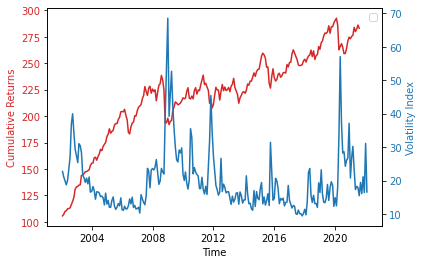

In [41]:
#(100 *(carry_trade['01-01-2002':] + 1).cumprod()).plot()
#vix_monthly['01-01-2002':].plot()

import matplotlib.pyplot as plt

carry_cum = (100 *(carry_trade['01-01-2002':] + 1).cumprod())
vix_monthly_time = vix_monthly['01-01-2002':]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Cumulative Returns', color=color)
ax1.plot( carry_cum, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Volatility Index', color=color)  # we already handled the x-label with ax1
ax2.plot(vix_monthly_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend()
plt.show()

<h4><center>PCA Loadings</center></h4>

|Portfolio | 1 | 2| 3 | 4 | 5 | 6 |
| --- | --- | --- | ---| --- | --- | --- |
|<b>1<b>|-0.33|-0.77|0.50|-0.20|0.08|-0.06|
|<b>2<b>|-0.43|-0.23|-0.30|0.55|-0.41|0.45|
|<b>3<b>|-0.44|-0.05|-0.42|0.20|0.29|-0.71|
|<b>4<b>|-0.44|0.18|-0.20|-0.36|0.58|0.52|
|<b>5<b>|-0.43|0.26|-0.02|-0.58|-0.63|-0.15|
|<b>6<b>|-0.37|0.51|0.66|0.40|0.09|-0.05|
|<b>% Var<b>|70.74|11.32|7.67|4.85|3.43|1.98|